In [1]:
import pandas as pd
import numpy as np


In [2]:
movies_metadata = pd.read_csv('whisper youtube trailer transcription.csv')
ratings = pd.read_csv(r'ratings_small_filtered_2.csv', index_col=0)

In [3]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81730 entries, 0 to 81729
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     81730 non-null  int64  
 1   movieId    81730 non-null  int64  
 2   rating     81730 non-null  float64
 3   timestamp  81730 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [4]:
unique_movieId_list = list(ratings['movieId'].unique())
len(unique_movieId_list)

6347

In [5]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   movieId        6338 non-null   int64 
 1   transcription  6319 non-null   object
dtypes: int64(1), object(1)
memory usage: 99.2+ KB


In [7]:
movies_metadata = movies_metadata[movies_metadata['movieId'].isin(unique_movieId_list)]
movies_metadata.reset_index(drop=True, inplace=True)

In [8]:
movies_metadata

,movieId,transcription
0,1,"Sergeant? Yes, sir. Establish a recon post do..."
1,2,I'm glad you decided to buy this place. I'm s...
2,3,Moron! Puts! Crankier. If my dog was as ugly ...
3,4,"Savannah, Bernadine, Robin, Gloria. Four frie..."
4,6,He's here. I can feel it. You search for the ...
...,...,...
6333,130682,There's no place I go. There's no place I go....
6334,130970,"But this, if you isolate one of them, you sit..."
6335,130980,The US military mobilized to conduct what in ...
6336,131013,This is Mr. King's car. Man owns the building...


In [9]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   movieId        6338 non-null   int64 
 1   transcription  6319 non-null   object
dtypes: int64(1), object(1)
memory usage: 99.2+ KB


In [13]:
movies_metadata = movies_metadata.dropna(subset=['transcription'])
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6319 entries, 0 to 6337
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   movieId        6319 non-null   int64 
 1   transcription  6319 non-null   object
dtypes: int64(1), object(1)
memory usage: 148.1+ KB


In [15]:
unique_movieId_list_movies_metadata = list(movies_metadata['movieId'].unique())
len(unique_movieId_list_movies_metadata)

6319

In [16]:
ratings = ratings[ratings['movieId'].isin(unique_movieId_list_movies_metadata)]
ratings.reset_index(drop=True, inplace=True)
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81337 entries, 0 to 81336
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     81337 non-null  int64  
 1   movieId    81337 non-null  int64  
 2   rating     81337 non-null  float64
 3   timestamp  81337 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 2.5 MB


In [17]:
movies_metadata = movies_metadata.rename(columns={'transcription': 'tags'})

In [18]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6319 entries, 0 to 6337
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  6319 non-null   int64 
 1   tags     6319 non-null   object
dtypes: int64(1), object(1)
memory usage: 148.1+ KB


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf.fit_transform(movies_metadata['tags'])

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
indices = pd.Series(movies_metadata.index, index=movies_metadata['movieId']).drop_duplicates()
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return movies_metadata['movieId'].iloc[movie_indices]

In [19]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81337 entries, 0 to 81336
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     81337 non-null  int64  
 1   movieId    81337 non-null  int64  
 2   rating     81337 non-null  float64
 3   timestamp  81337 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 2.5 MB


In [20]:
ratings['rating'] = ratings['rating'].apply(lambda x: 1 if x > 3.5 else 0)

In [21]:
ratings

,userId,movieId,rating,timestamp
0,1,31,0,1260759144
1,1,1061,0,1260759182
2,1,1129,0,1260759185
3,1,1172,1,1260759205
4,1,1263,0,1260759151
...,...,...,...,...
81332,671,6212,0,1065149436
81333,671,6268,0,1065579370
81334,671,6365,1,1070940363
81335,671,6385,0,1070979663


In [22]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81337 entries, 0 to 81336
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   userId     81337 non-null  int64
 1   movieId    81337 non-null  int64
 2   rating     81337 non-null  int64
 3   timestamp  81337 non-null  int64
dtypes: int64(4)
memory usage: 2.5 MB


## previous

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix



# Step 1: Create the TF-IDF matrix and compute cosine similarity
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies_metadata['tags'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Create a reverse mapping of indices and movieId
indices = pd.Series(movies_metadata.index, index=movies_metadata['movieId']).drop_duplicates()

def get_recommendations(movieId, cosine_sim=cosine_sim):
    if movieId not in indices:
        return []
    idx = indices[movieId]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Top 10 similar movies
    movie_indices = [i[0] for i in sim_scores]
    return movies_metadata['movieId'].iloc[movie_indices]

# Step 2: Integrate User Ratings
user_item_matrix = ratings.pivot(index='userId', columns='movieId', values='rating')

# Function to get k-nearest neighbors based on item-item similarity
def get_k_nearest_neighbors(item_similarity_df, movie_id, k=10):
    if movie_id not in item_similarity_df.columns:
        return pd.Index([])
    sim_scores = item_similarity_df[movie_id]
    nearest_neighbors = sim_scores.sort_values(ascending=False).index[1:k+1]
    return nearest_neighbors

# Function to predict rating for a specific user and movie
def predict_rating(user_item_matrix, item_similarity_df, user_id, movie_id, k=10):
    nearest_neighbors = get_k_nearest_neighbors(item_similarity_df, movie_id, k)
    if nearest_neighbors.empty:
        return 0
    neighbor_ratings = user_item_matrix.loc[user_id, nearest_neighbors]
    if neighbor_ratings.isna().all():
        return 0
    return Counter(neighbor_ratings.dropna()).most_common(1)[0][0]

# Compute the item similarity DataFrame using movie metadata
item_similarity_df = pd.DataFrame(cosine_sim, index=movies_metadata['movieId'], columns=movies_metadata['movieId'])

# Split the ratings data into training and testing sets
train_ratings = ratings.sample(frac=0.8, random_state=42)
test_ratings = ratings.drop(train_ratings.index)

# Evaluate at K=255
K = 255
y_true_all = []
y_pred_all = []

for index, row in test_ratings.iterrows():
    user_id = row['userId']
    movie_id = row['movieId']
    y_true_all.append(row['rating'])
    y_pred_all.append(predict_rating(user_item_matrix, item_similarity_df, user_id, movie_id, k=K))

# Convert to integers
y_true_all = [int(val) for val in y_true_all]
y_pred_all = [int(val) for val in y_pred_all]

# Generate classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_true_all, y_pred_all))

print("Confusion Matrix:")
print(confusion_matrix(y_true_all, y_pred_all))


Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.66      0.65      7901
           1       0.67      0.66      0.67      8445

    accuracy                           0.66     16346
   macro avg       0.66      0.66      0.66     16346
weighted avg       0.66      0.66      0.66     16346

Confusion Matrix:
[[5177 2724]
 [2871 5574]]


### BERT try

In [41]:
timepass =movies_metadata.loc[20:21]

In [25]:
from tqdm import tqdm

import pandas as pd
import numpy as np
import torch
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix

/home/patel8m6/Desktop/python scripts/mldl/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
# Load pre-trained multilingual BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased')
model = BertModel.from_pretrained('bert-base-multilingual-uncased')

/home/patel8m6/Desktop/python scripts/mldl/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [27]:
def get_bert_embedding(text, tokenizer, model):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Compute BERT embeddings for each movie's tags with progress bar
bert_embeddings = []
for tag in tqdm(movies_metadata['tags'], desc="Computing BERT embeddings"):
    bert_embeddings.append(get_bert_embedding(tag, tokenizer, model))

movies_metadata['bert_embedding'] = bert_embeddings

Computing BERT embeddings: 100%|████████████| 6319/6319 [09:38<00:00, 10.92it/s]


In [29]:
# Compute cosine similarity between BERT embeddings
movie_embeddings = np.stack(movies_metadata['bert_embedding'].values)
cosine_sim = cosine_similarity(movie_embeddings, movie_embeddings)

In [30]:
# Create a reverse mapping of indices and movieId
indices = pd.Series(movies_metadata.index, index=movies_metadata['movieId']).drop_duplicates()

def get_recommendations(movieId, cosine_sim=cosine_sim):
    if movieId not in indices:
        return []
    idx = indices[movieId]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Top 10 similar movies
    movie_indices = [i[0] for i in sim_scores]
    return movies_metadata['movieId'].iloc[movie_indices]

# Step 2: Integrate User Ratings
user_item_matrix = ratings.pivot(index='userId', columns='movieId', values='rating')

# Function to get k-nearest neighbors based on item-item similarity
def get_k_nearest_neighbors(item_similarity_df, movie_id, k=10):
    if movie_id not in item_similarity_df.columns:
        return pd.Index([])
    sim_scores = item_similarity_df[movie_id]
    nearest_neighbors = sim_scores.sort_values(ascending=False).index[1:k+1]
    return nearest_neighbors

# Function to predict rating for a specific user and movie
def predict_rating(user_item_matrix, item_similarity_df, user_id, movie_id, k=10):
    nearest_neighbors = get_k_nearest_neighbors(item_similarity_df, movie_id, k)
    if nearest_neighbors.empty:
        return 0
    neighbor_ratings = user_item_matrix.loc[user_id, nearest_neighbors]
    if neighbor_ratings.isna().all():
        return 0
    return Counter(neighbor_ratings.dropna()).most_common(1)[0][0]

# Compute the item similarity DataFrame using BERT embeddings
item_similarity_df = pd.DataFrame(cosine_sim, index=movies_metadata['movieId'], columns=movies_metadata['movieId'])

# Split the ratings data into training and testing sets
train_ratings = ratings.sample(frac=0.8, random_state=42)
test_ratings = ratings.drop(train_ratings.index)

# Evaluate at K=255
K = 255
y_true_all = []
y_pred_all = []

for index, row in test_ratings.iterrows():
    user_id = row['userId']
    movie_id = row['movieId']
    y_true_all.append(row['rating'])
    y_pred_all.append(predict_rating(user_item_matrix, item_similarity_df, user_id, movie_id, k=K))

# Convert to integers
y_true_all = [int(val) for val in y_true_all]
y_pred_all = [int(val) for val in y_pred_all]

# Generate classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_true_all, y_pred_all))

print("Confusion Matrix:")
print(confusion_matrix(y_true_all, y_pred_all))


Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.66      0.64      7803
           1       0.67      0.65      0.66      8464

    accuracy                           0.65     16267
   macro avg       0.65      0.65      0.65     16267
weighted avg       0.65      0.65      0.65     16267

Confusion Matrix:
[[5125 2678]
 [2991 5473]]


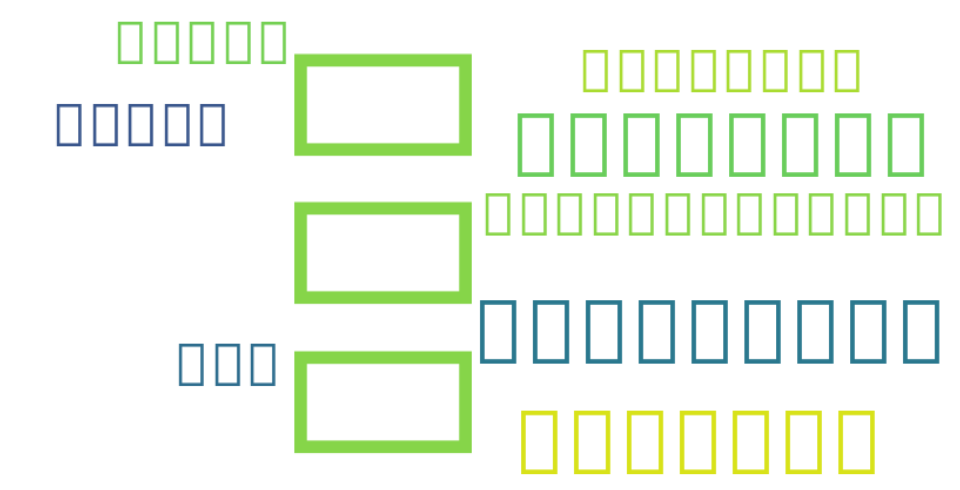

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all the tags into a single string
all_tags = ' '.join(timepass['tags'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tags)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

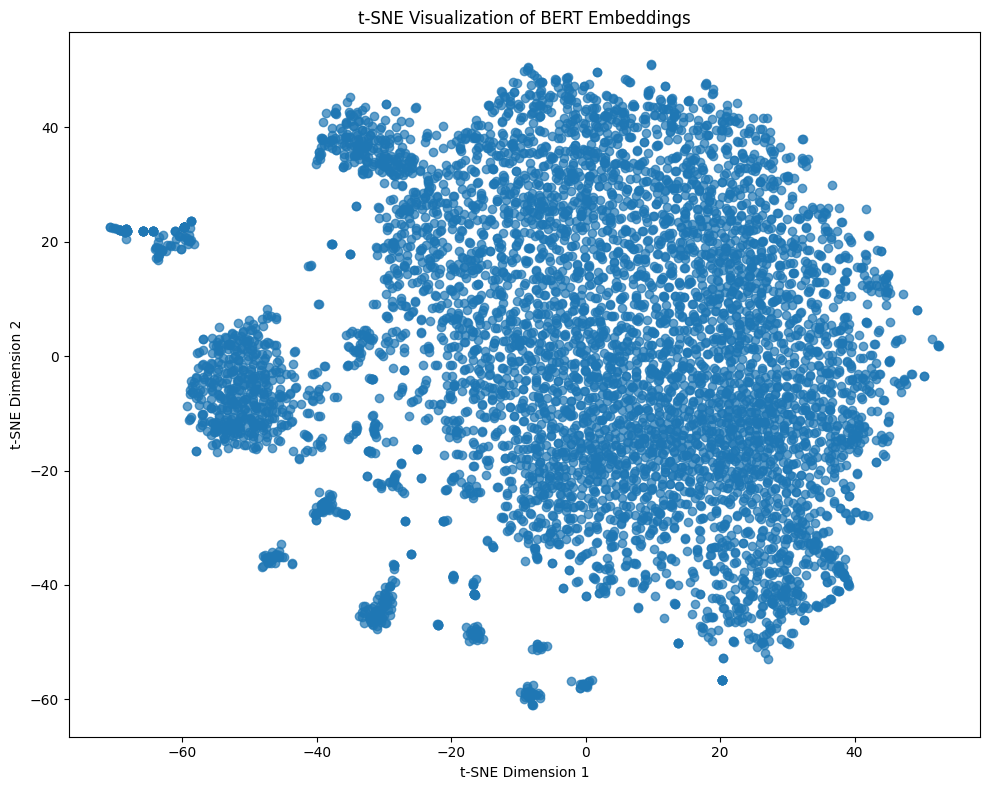

In [45]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Perform t-SNE on the BERT embeddings
tsne = TSNE(n_components=2, random_state=42)
tsne_embeddings = tsne.fit_transform(movie_embeddings)

# Create a scatter plot of the t-SNE embeddings
plt.figure(figsize=(10, 8))
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], alpha=0.7)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of BERT Embeddings')
plt.tight_layout()
plt.savefig('embessings BERT multilangguage whisper.png')
plt.show()

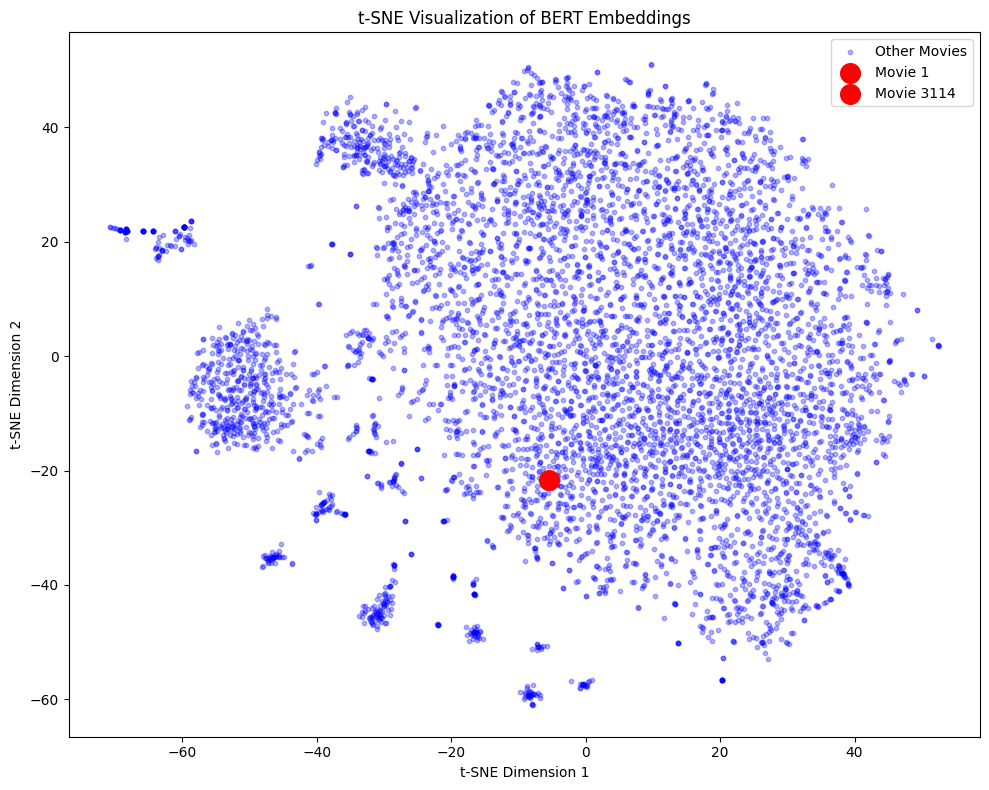

In [51]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Perform t-SNE on the BERT embeddings
tsne = TSNE(n_components=2, random_state=42)
tsne_embeddings = tsne.fit_transform(movie_embeddings)

# Create a scatter plot of the t-SNE embeddings
plt.figure(figsize=(10, 8))

# Plot the remaining movies in blue with reduced opacity
normal_mask = ~movies_metadata['movieId'].isin([1, 3114])
plt.scatter(tsne_embeddings[normal_mask, 0], tsne_embeddings[normal_mask, 1], alpha=0.3, color='blue', label='Other Movies', s=10)

# Plot movies with movieId 1 and 3114 in red with larger size
highlighted_movies = [1, 3114]
for movie_id in highlighted_movies:
    movie_mask = movies_metadata['movieId'] == movie_id
    plt.scatter(tsne_embeddings[movie_mask, 0], tsne_embeddings[movie_mask, 1], alpha=1.0, color='red', s=200, label=f'Movie {movie_id}')

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of BERT Embeddings')
plt.legend()
plt.tight_layout()
plt.savefig('embeddings_BERT_multilanguage_whisper_highlighted.png')
plt.show()

In [67]:
movies_metadata.loc[movies_metadata['movieId'] == 153]


,movieId,tags,bert_embedding
100,153,You You You And I persuade you to take a sand...,"[-0.032828875, -0.1980984, 0.2627273, 0.049920..."


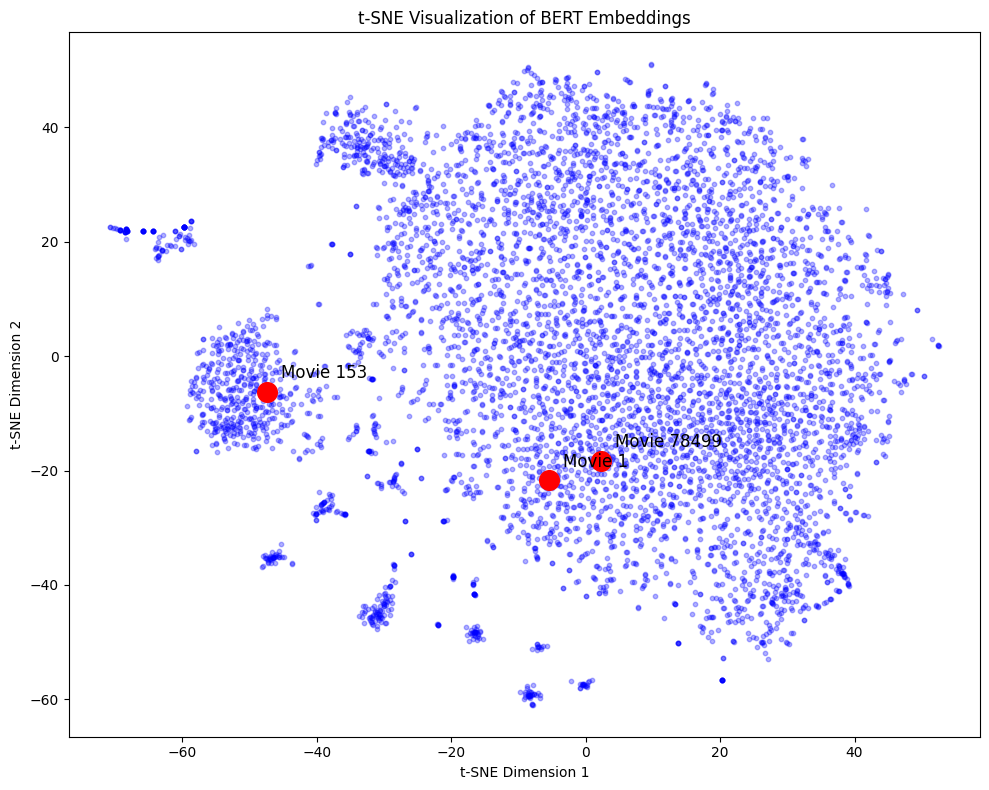

In [68]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Perform t-SNE on the BERT embeddings
tsne = TSNE(n_components=2, random_state=42)
tsne_embeddings = tsne.fit_transform(movie_embeddings)

# Create a scatter plot of the t-SNE embeddings
plt.figure(figsize=(10, 8))

# Plot the remaining movies in blue with reduced opacity
normal_mask = ~movies_metadata['movieId'].isin([1, 3114])
plt.scatter(tsne_embeddings[normal_mask, 0], tsne_embeddings[normal_mask, 1], alpha=0.3, color='blue', label='Other Movies', s=10)

# Plot movies with movieId listed in red with larger size
highlighted_movies = [1, 78499, 153]
for movie_id in highlighted_movies:
    movie_mask = movies_metadata['movieId'] == movie_id
    if movie_mask.any():
        plt.scatter(tsne_embeddings[movie_mask, 0], tsne_embeddings[movie_mask, 1], alpha=1.0, color='red', s=200)
        
        # Add annotation for each highlighted movie
        x = tsne_embeddings[movie_mask, 0][0]
        y = tsne_embeddings[movie_mask, 1][0]
        plt.annotate(f'Movie {movie_id}', (x, y), textcoords='offset points', xytext=(10, 10), ha='left', fontsize=12)

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of BERT Embeddings')
plt.tight_layout()
plt.savefig('embeddings_BERT_multilanguage_whisper_highlighted 1, 78499, 8844.png')
plt.show()

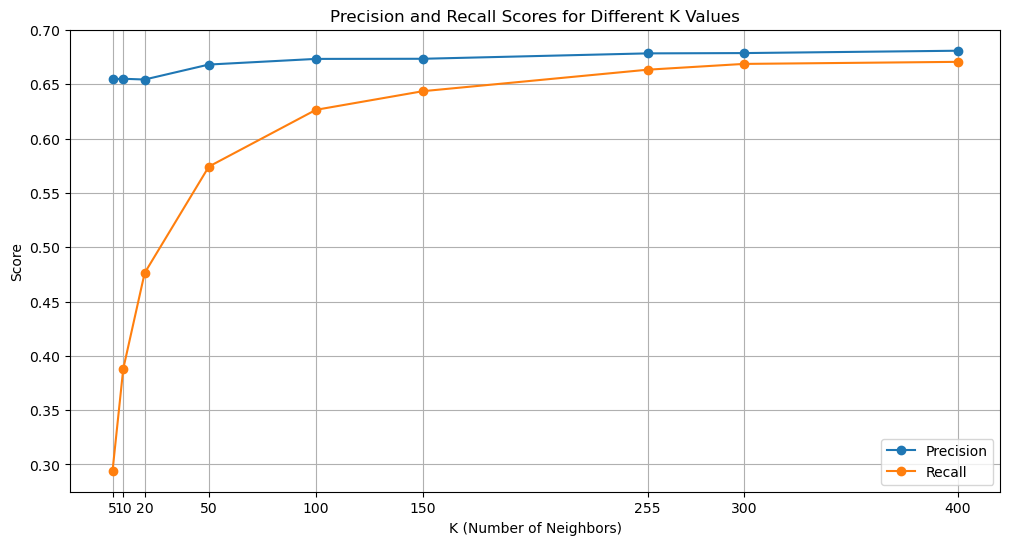

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score


# Define the list of K values
K_values = [5, 10, 20, 50, 100, 150, 255, 300, 400]

# Initialize lists to store precision and recall values for each K
precision_scores = []
recall_scores = []

for K in K_values:
    # Perform prediction and evaluation
    y_true_all = []
    y_pred_all = []

    for index, row in test_ratings.iterrows():
        user_id = row['userId']
        movie_id = row['movieId']
        y_true_all.append(row['rating'])
        y_pred_all.append(predict_rating(user_item_matrix, item_similarity_df, user_id, movie_id, k=K))

    # Convert to integers
    y_true_all = [int(val) for val in y_true_all]
    y_pred_all = [int(val) for val in y_pred_all]

    # Calculate precision and recall
    precision = precision_score(y_true_all, y_pred_all)
    recall = recall_score(y_true_all, y_pred_all)

    # Append scores to lists
    precision_scores.append(precision)
    recall_scores.append(recall)

# Plot the precision and recall scores for different values of K
plt.figure(figsize=(12, 6))
plt.plot(K_values, precision_scores, label='Precision', marker='o')
plt.plot(K_values, recall_scores, label='Recall', marker='o')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Score')
plt.title('Precision and Recall Scores for Different K Values')
plt.xticks(K_values)
plt.legend()
plt.grid(True)
plt.show()
